In [225]:
# Reference https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter04/car_rental.py
# Reference https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter04/car_rental_synchronous.py
import numpy as np
import random
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [226]:
def poisson(n, l, key):
    value =  math.exp(-l) * math.pow(l, n) / math.factorial(n)
    if key not in diction_poisson:
        diction_poisson[key] = value
        return diction_poisson[key]
    else:
        return diction_poisson[key]

In [227]:
def reward(s, a, V): #2
    ret = float(0)
    if a > 0:
        # One free move
        ret += COST_OF_MOVING * (a-1)
    else:
        ret += COST_OF_MOVING * abs(a)
    
    for i in range(POISSON_UPPER_BOUND):
        for j in range(POISSON_UPPER_BOUND):
            
            cars1 = int(min(s[0] - a, MAX_CARS))
            cars2 = int(min(s[1] + a, MAX_CARS))

            prob = poisson(i, EXPECTED_FIRST_LOC_REQUESTS, (i, EXPECTED_FIRST_LOC_REQUESTS)) * poisson(j, EXPECTED_SECOND_LOC_REQUESTS, (j, EXPECTED_SECOND_LOC_REQUESTS))

            valid_rental_first_loc = min(cars1, i)
            valid_rental_second_loc = min(cars2, j)
            total_valid = valid_rental_first_loc + valid_rental_second_loc

            reward = RENTAL_CREDIT * total_valid
            
            if cars1 > PERMISSIBLE_CAPACITY:
                reward += ADDITIONAL_PARK_COST
            if cars2 > PERMISSIBLE_CAPACITY:
                reward += ADDITIONAL_PARK_COST
                
            cars1 = cars1 - valid_rental_first_loc
            cars2 = cars2 - valid_rental_second_loc
            
            for r1 in range(POISSON_UPPER_BOUND):
                for r2 in range(POISSON_UPPER_BOUND):
                    cars1 = min(cars1 + r1, MAX_CARS)
                    cars2 = min(cars2 + r2, MAX_CARS)
                    probnew = poisson(r1, RETURNS_FIRST_LOC, (r1, RETURNS_FIRST_LOC)) * poisson(r2, RETURNS_SECOND_LOC, (r2, RETURNS_SECOND_LOC)) * prob
                    ret += probnew * (reward + DISCOUNT * V[int(cars1 * (MAX_CARS + 1) + cars2)])
    return ret

In [228]:
def policy_evaluation(V, policy):
    cnt = 0
    while(1):
        delta = 0
        for s in range(num_states):
            oldV = V[s]
            newV = reward([s//(MAX_CARS+1), s%(MAX_CARS+1)], policy[s], V)
            V[s] = newV
            delta = max(delta, np.abs(oldV - newV))
        print("delta = ", delta)
        cnt += 1
        if delta < lim:
            return V

In [229]:
def policy_improvement(V, policy):
    policy_stable = True
    for s in range(num_states):
        old_action = policy[s]
        holder = []
        for a in actions:
            holder.append(reward([s//(MAX_CARS+1), s%(MAX_CARS+1)], a, V))
#             if (0 <= action <= i) or (-j <= action <= 0):
#                 holder.append(reward([s//(MAX_CARS+1), s%(MAX_CARS+1)], a, V))
#             else:
#                 holder.append(-np.inf)
        
        maxind = np.argmax(holder)
        bestaction = actions[maxind]
        policy[s] = bestaction
        if(old_action != bestaction):
            policy_stable = False

    return policy_stable, policy

In [230]:
def policy_iteration(policy, V, actions):
    res = True
    it = 0
#     _, axes = plt.subplots(2, 3, figsize=(40, 20))
#     plt.subplots_adjust(wspace=0.1, hspace=0.2)
#     axes = axes.flatten()
    while(1):
#         fig = sns.heatmap(np.flipud(np.reshape(policy, (MAX_CARS+1, MAX_CARS+1))), cmap="YlGnBu", ax=axes[it])
#         fig.set_ylabel('# cars at first location', fontsize=30)
#         fig.set_yticks(list(reversed(range(MAX_CARS + 1))))
#         fig.set_xlabel('# cars at second location', fontsize=30)
#         fig.set_title('policy {}'.format(it), fontsize=30)
        
        V = policy_evaluation(V, policy)
        res, policy = policy_improvement(V, policy)
        
        if res == True:
#             fig = sns.heatmap(np.flipud(np.reshape(V, (MAX_CARS+1, MAX_CARS+1))), cmap="YlGnBu", ax=axes[-1])
#             fig.set_ylabel('# cars at first location', fontsize=30)
#             fig.set_yticks(list(reversed(range(MAX_CARS + 1))))
#             fig.set_xlabel('# cars at second location', fontsize=30)
#             fig.set_title('optimal value', fontsize=30)
            break
        it += 1
    return V, policy

[[72.  0.  0.]
 [ 0. 72.  0.]
 [ 0.  0.  1.]]
[[558.           0.         360.        ]
 [  0.         494.18181818 773.01818182]
 [  0.           0.           1.        ]]
[[ 0.04761905  0.         -0.        ]
 [ 0.         -0.04761905  1.        ]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[6.97500000e+02 0.00000000e+00 1.12725000e+03]
 [0.00000000e+00 4.94181818e+02 7.73018182e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[6.97500000e+02 0.00000000e+00 1.89450000e+03]
 [0.00000000e+00 4.94181818e+02 7.73018182e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[697.5          0.         360.        ]
 [  0.         494.18181818 180.        ]
 [  0.           0.           1.        ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[6.97

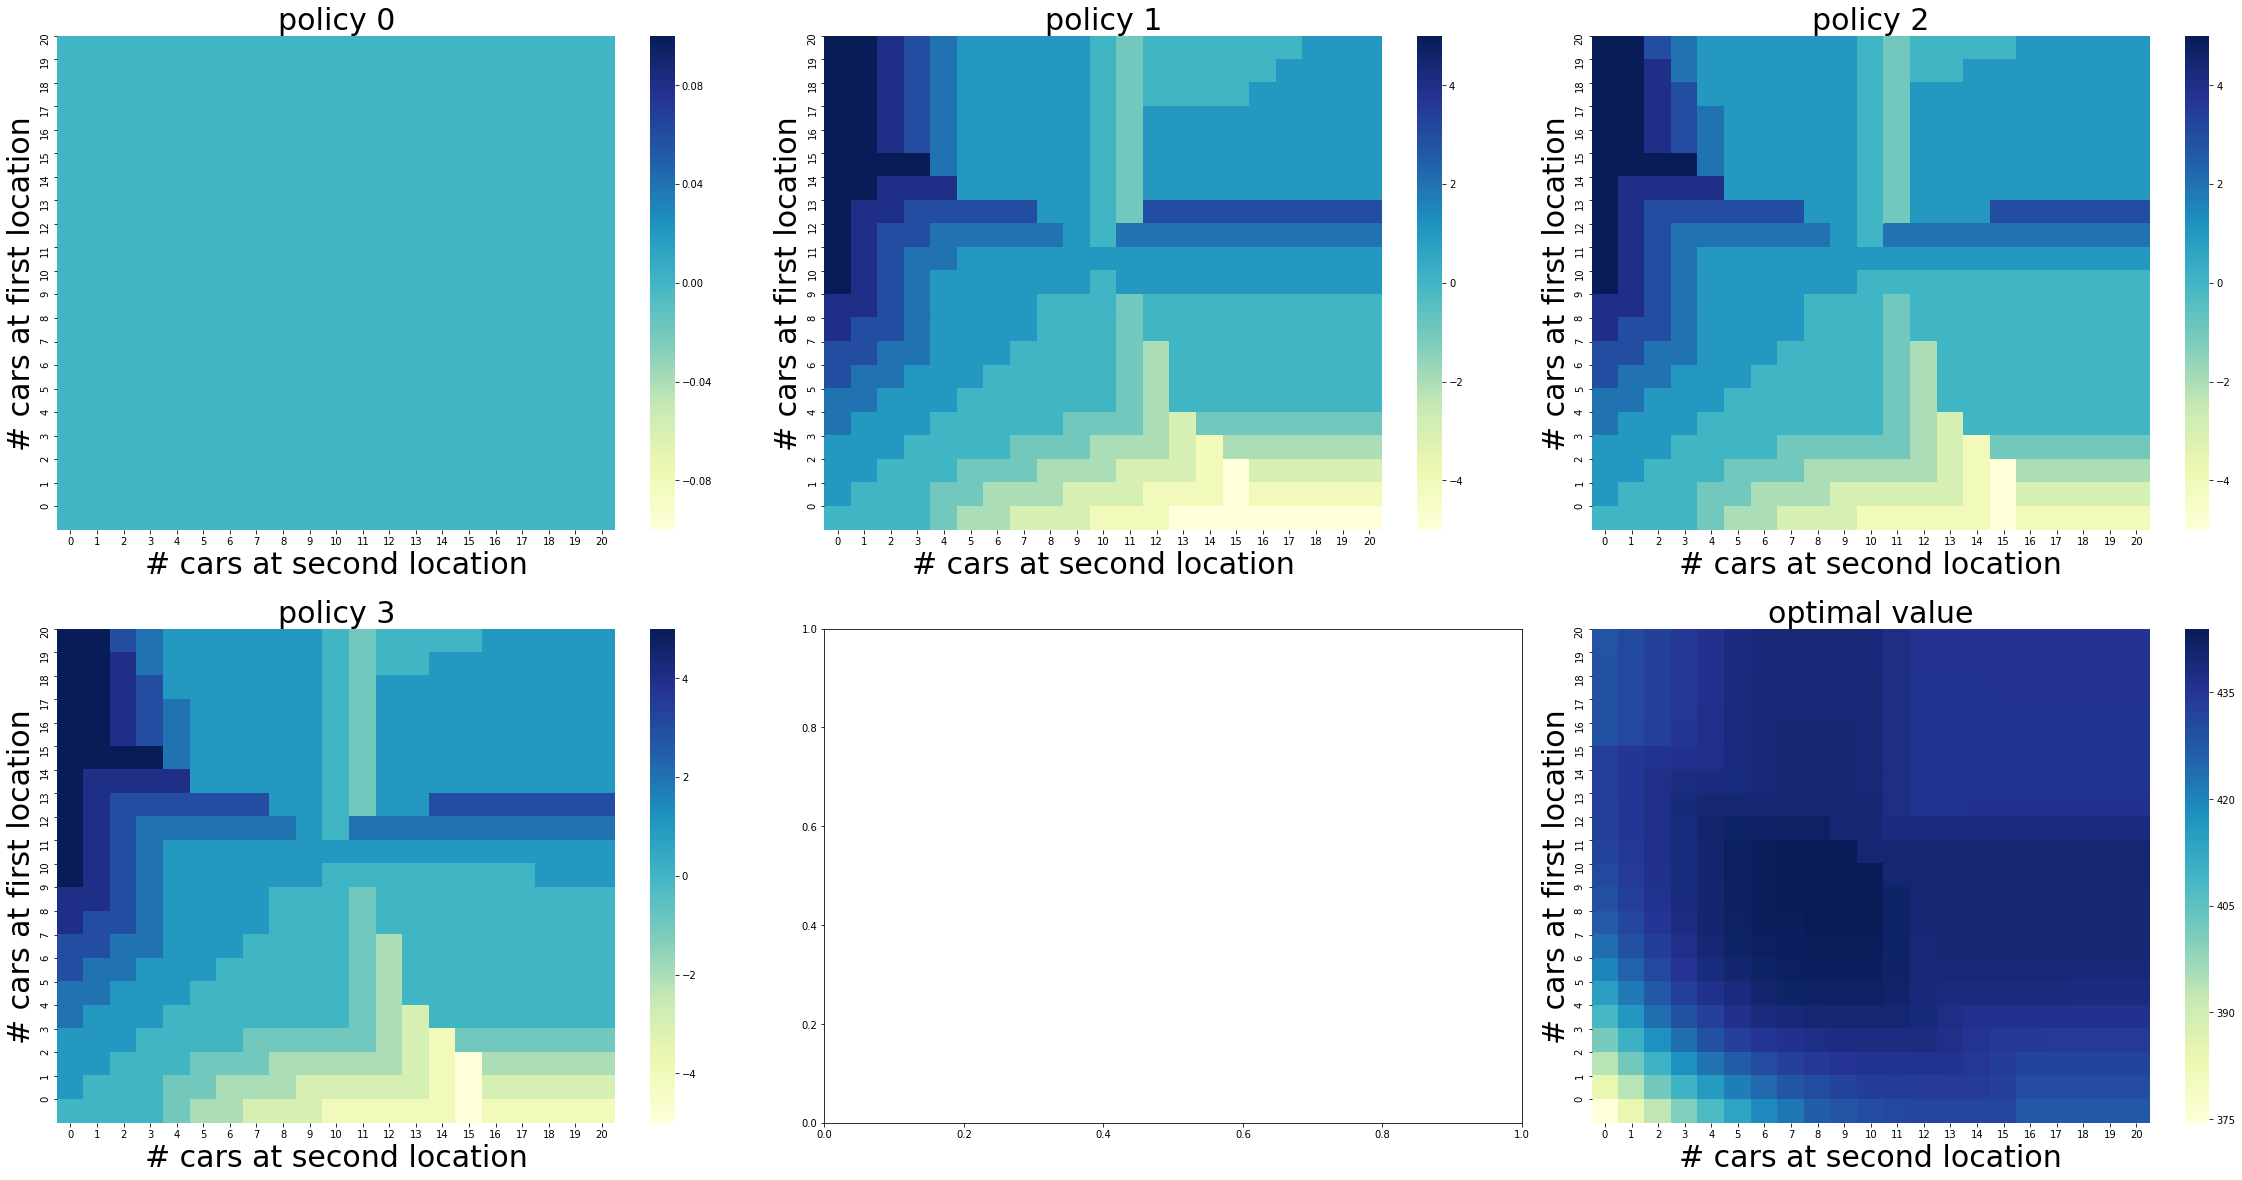

In [231]:
# Initialize constants
MAX_CARS = 20
MAX_MOVE_OF_CARS = 5
EXPECTED_FIRST_LOC_REQUESTS = 3
EXPECTED_SECOND_LOC_REQUESTS = 4
RETURNS_FIRST_LOC = 3
RETURNS_SECOND_LOC = 2
DISCOUNT = 0.9
RENTAL_CREDIT = 10
COST_OF_MOVING = -2
ADDITIONAL_PARK_COST = -4
PERMISSIBLE_CAPACITY = 10
num_states = (MAX_CARS + 1) * (MAX_CARS + 1)
lim = 10
POISSON_UPPER_BOUND = 9

# The states here are defined as the number of cars at each of the 2 locations
# Therefore we have a total of 441 states 21
num_states = (MAX_CARS+1) * (MAX_CARS+1)
# V = np.zeros(shape=(MAX_CARS+1, MAX_CARS+1))
V = np.zeros(num_states)
policy = np.zeros(num_states) # 1
actions = np.arange(-1 * MAX_MOVE_OF_CARS, MAX_MOVE_OF_CARS + 1)
diction_poisson = {}

V, policy = policy_iteration(policy, V, actions)

[[5.40540541 0.         0.51351351]
 [0.         5.40540541 0.51351351]
 [0.         0.         1.        ]]
[[ 21.744   0.    338.58 ]
 [  0.    108.72   90.36 ]
 [  0.      0.      1.   ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 21.744   0.    295.28 ]
 [  0.    108.72   65.06 ]
 [  0.      0.      1.   ]]


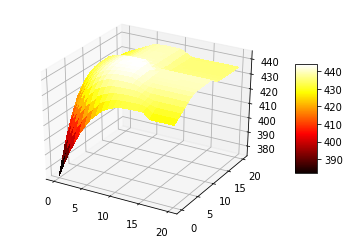

In [233]:
#Plotting code taken from https://stackoverflow.com/questions/11766536/matplotlib-3d-surface-from-a-rectangular-array-of-heights
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np

# X = np.arange(0, 21)
# Y = np.arange(0, 21)
# X, Y = np.meshgrid(X, Y)
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf = ax.plot_surface(X, Y, np.reshape(V, (MAX_CARS+1, MAX_CARS+1)), rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)

# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.show()